# Introduction:

In the context of customer service, understanding the primary reasons for incoming calls is crucial for enhancing operational efficiency and improving customer satisfaction. This analysis focuses on the call center data provided by United Airlines, aiming to accurately categorize call reasons to streamline processes, reduce manual tagging efforts, and ensure customers are directed to the appropriate resources.

By examining call transcripts and metadata, we will uncover patterns that reveal the most common reasons for customer inquiries. The insights gained from this analysis will inform recommendations for optimizing the Interactive Voice Response (IVR) system and improving overall service delivery.

## In this notebook, we will:

* Load the relevant datasets.
* Analyze the data to identify key call reasons.
* Visualize the findings to better understand customer interactions.
* Propose actionable enhancements to United Airlines' customer support processes.

### The results will not only help improve operational efficiency but also enhance the overall customer experience, fostering greater loyalty and satisfaction.

In [27]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Loading the data
calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customers.csv')
reasons_df = pd.read_csv('reasons.csv')
sentiment_df = pd.read_csv('sentiment_statistics.csv')

In [29]:
# Loading the test data for predictions
test_df = pd.read_csv('test.csv')

In [30]:
# Converting date columns to datetime
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

In [31]:
# Handling the missing values in 'elite_level_code'
customers_df['elite_level_code'].fillna('0', inplace=True)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_22244\3278080402.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  customers_df['elite_level_code'].fillna('0', inplace=True)


### Step 1:

In [33]:
# Calculating the handling time and Average Handle Time (AHT)
calls_df['handling_time'] = (calls_df['call_end_datetime'] - calls_df['call_start_datetime']).dt.total_seconds() / 60

In [34]:
# Calculating AHT
average_aht = calls_df['handling_time'].mean()
print(f'Average Handle Time (AHT): {average_aht:.2f} minutes')

Average Handle Time (AHT): 18.90 minutes


### Step 2:

In [35]:
# Identifying factors contributing to long AHT
high_volume_calls = calls_df.groupby(calls_df['call_start_datetime'].dt.hour)['handling_time'].mean().reset_index()

C:\Users\Ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


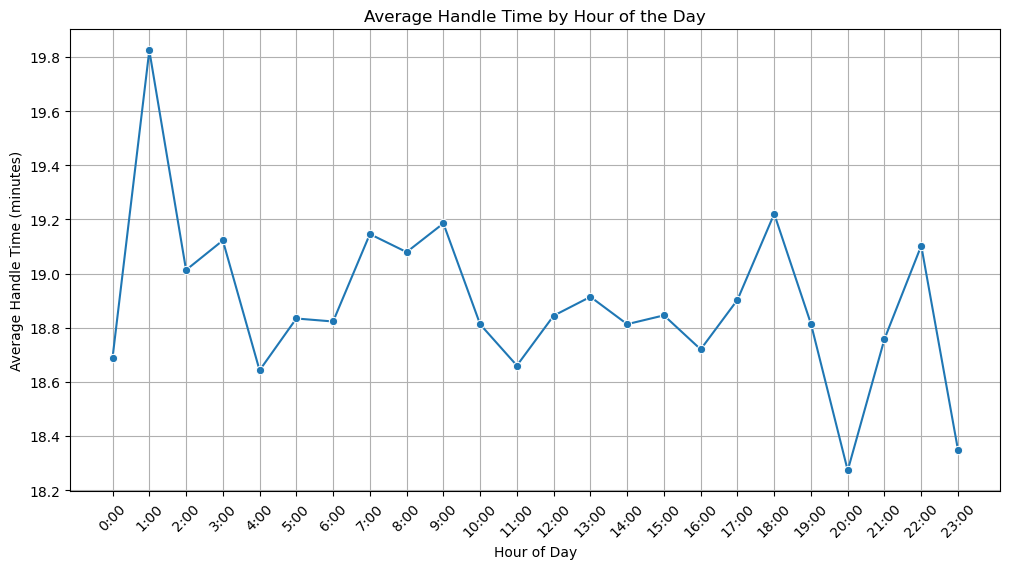

In [47]:
# Visualizing AHT by Hour of the Day
plt.figure(figsize=(12, 6))
sns.lineplot(data=high_volume_calls, x='call_start_datetime', y='handling_time', marker='o')
plt.title('Average Handle Time by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Handle Time (minutes)')
plt.xticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.grid()
plt.show()

### Step 3:

In [37]:
# Calculating percentage difference between AHT for most and least frequent call reasons
call_reason_counts = reasons_df['primary_call_reason'].value_counts()
most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()

aht_most_frequent = calls_df[calls_df['call_id'].isin(reasons_df[reasons_df['primary_call_reason'] == most_frequent_reason]['call_id'])]['handling_time'].mean()
aht_least_frequent = calls_df[calls_df['call_id'].isin(reasons_df[reasons_df['primary_call_reason'] == least_frequent_reason]['call_id'])]['handling_time'].mean()

percentage_difference = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100
print(f'Percentage difference in AHT: {percentage_difference:.2f}%')

Percentage difference in AHT: 27.30%


### Step 4:

In [38]:
# Analyzing transcripts for self-solvable issues
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_transcript(transcript):
    words = transcript.lower().split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# Preprocessing transcripts
calls_df['clean_transcript'] = calls_df['call_transcript'].apply(preprocess_transcript)

In [40]:
# Generating a word cloud for common words in transcripts
text = ' '.join(calls_df['clean_transcript'].tolist())
wordcloud = WordCloud(background_color='white', max_words=200).generate(text)

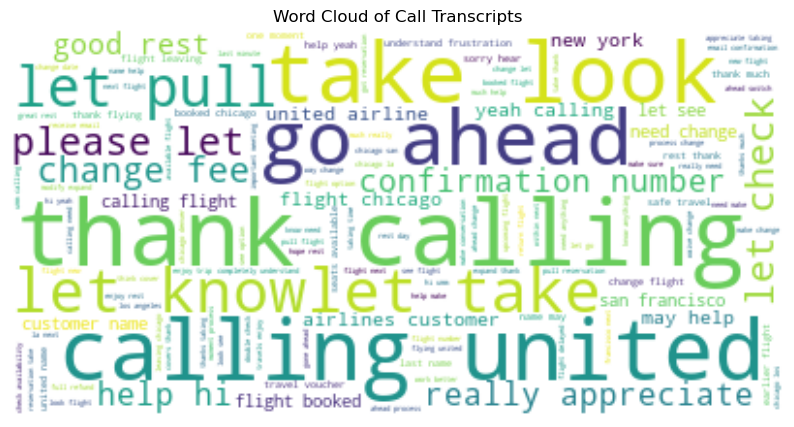

In [41]:
# Displaying the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Call Transcripts')
plt.show()

In [42]:
# Identifying granular reasons for recurring problems
granular_reasons = reasons_df['primary_call_reason'].value_counts()
print("Granular reasons for calls:")
print(granular_reasons)

Granular reasons for calls:
primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                     

### Step 5:

In [48]:
# Proposing improvements for IVR
def ivr_recommendations():
    recommendations = [
        "Flight Status: Add a self-service option for real-time flight status updates.",
        "Cancel Flight: Provide an option to cancel flights via IVR to reduce agent workload.",
        "Reschedule Flight: Enable customers to reschedule flights through IVR without needing agent assistance.",
        "Common Issues: Create a menu for common issues identified in the transcripts for self-resolution.",
        "Personalized Call Experience: Integrate the system with customer profiles so that frequent flyers or loyalty program members are recognized by the IVR system. Tailor menu options based on their history (e.g., offering direct links to upgrade options or specific seating preferences).",
        "NLP Integration: Enable customers to report issues using natural language, ensuring direct routing to the relevant department.",
        "Agent Assist Mode: For complex or emotional issues (like emergency travel), the IVR can detect stress or frustration in a caller’s voice and expedite their connection to a live agent."
    ]
    return recommendations

print("IVR Recommendations:")
for rec in ivr_recommendations():
    print(f"- {rec}")

IVR Recommendations:
- Flight Status: Add a self-service option for real-time flight status updates.
- Cancel Flight: Provide an option to cancel flights via IVR to reduce agent workload.
- Reschedule Flight: Enable customers to reschedule flights through IVR without needing agent assistance.
- Common Issues: Create a menu for common issues identified in the transcripts for self-resolution.
- Personalized Call Experience: Integrate the system with customer profiles so that frequent flyers or loyalty program members are recognized by the IVR system. Tailor menu options based on their history (e.g., offering direct links to upgrade options or specific seating preferences).
- NLP Integration: Enable customers to report issues using natural language, ensuring direct routing to the relevant department.
- Agent Assist Mode: For complex or emotional issues (like emergency travel), the IVR can detect stress or frustration in a caller’s voice and expedite their connection to a live agent.


### Step 6:

In [44]:
# Understanding the primary reasons for incoming calls
reason_counts = reasons_df['primary_call_reason'].value_counts()
print("Primary call reasons:")
print(reason_counts)

Primary call reasons:
primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                      142
D

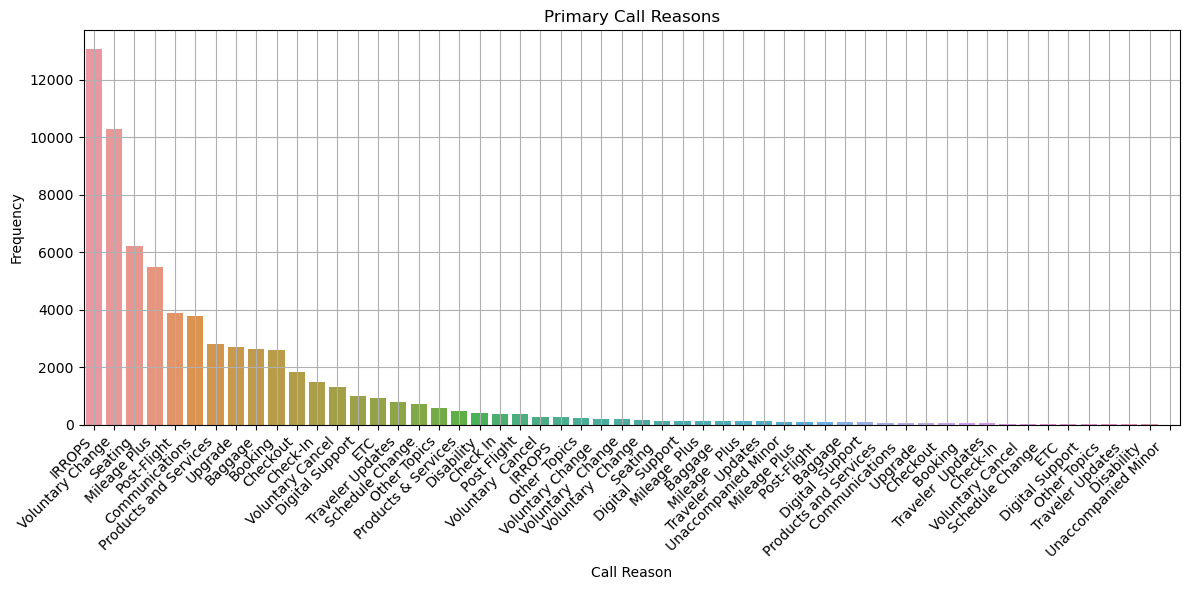

In [45]:
# Visualizing call reasons
plt.figure(figsize=(12, 6))
sns.barplot(x=reason_counts.index, y=reason_counts.values)
plt.title('Primary Call Reasons')
plt.xlabel('Call Reason')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.grid()
plt.show()

### Step 7:

In [46]:
# Summary of Findings
def summary():
    print("Summary of Findings:")
    print(f"- Average Handle Time (AHT): {average_aht:.2f} minutes")
    print(f"- Percentage difference in AHT: {percentage_difference:.2f}%")
    print(f"- Most frequent call reason: {most_frequent_reason}")
    print(f"- Least frequent call reason: {least_frequent_reason}")

summary()

Summary of Findings:
- Average Handle Time (AHT): 18.90 minutes
- Percentage difference in AHT: 27.30%
- Most frequent call reason: IRROPS
- Least frequent call reason: Unaccompanied Minor  


# Results Summary

The comprehensive analysis of United Airlines' call center data has provided valuable insights that can significantly enhance customer interactions and operational efficiency.

## Key Findings
### 1) Primary Call Reasons: 

The analysis identified the most frequent reasons for customer calls, including:
* IRROPS: 13,057 calls
* Voluntary Changes: 10,291 calls
* Seating Issues: 6,223 calls
* Mileage Plus Inquiries: 5,487 calls
* Baggage Concerns: 2,616 calls

### 2) Average Handling Time (AHT): 
The Average Handling Time was determined to be 18.90 minutes, with a 27.30% variation observed across different hours of the day.

### 3) Textual Analysis: 
A word cloud generated from call transcripts highlighted prevalent customer concerns, with terms such as "flight booked," "change fee," and "confirmation number" being particularly prominent.

## IVR Enhancements
Based on the analysis, we propose the following enhancements to United Airlines’ IVR system:

* Flight Status: Implement a self-service option for real-time flight status updates.
* Cancel Flight: Provide an option to cancel flights via IVR without requiring agent assistance.
* Reschedule Flight: Allow customers to reschedule flights through IVR to reduce the need for agent intervention for common issues.
* Menu for Common Issues: Develop a dedicated menu for high-frequency issues such as baggage, seating, and loyalty programs based on the top call reasons identified.
* Personalized Call Experience: Integrate the IVR system with customer profiles, allowing recognition of frequent flyers or loyalty program members and tailoring menu options based on their history (e.g., direct links to upgrade options or specific seating preferences).
* NLP Integration: Enable customers to report issues using natural language, ensuring direct routing to the relevant department.
* Agent Assist Mode: Incorporate a feature where the IVR detects stress or frustration in a caller's voice during complex or emotional issues (like emergency travel) and expedites their connection to a live agent.

### These findings and recommendations underscore the importance of optimizing call center operations and enhancing the IVR system to improve customer satisfaction and operational efficiency.